In [2]:
library(data.table)
library(tidyverse)
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFs/')
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")


In [3]:
#Computing Fst between pool-seq and haf's

In [4]:
#Fst between subsampled reads:
load('./orch2021_SubSampReads.A.RData')
set.a = afmat
load('./orch2021_SubSampReads.B.RData')
set.b = afmat
data.sub.reads = data.frame()
for(i in 1:ncol(set.a)){
    df = cbind(set.a[,i], set.b[,i])
    fst.mat = Fst.mat(df)
    fst = fst.mat[1,2]
    samp = names(set.a)[i]
    df.fst = cbind(samp, fst)
    data.sub.reads = rbind(data.sub.reads, df.fst)
    
}
data.sub.reads$type = 'Sub-sampled Reads'
write.csv(data.sub.reads, 'SubSampledReads.Fst.csv', row.names = FALSE)

In [25]:
#Fst between each different coverage and the HAF's
covs = c('100x', '75x', '50x', '25x', '8x')


data.poolseq.meta = data.frame()
for (cov in covs){
    load(paste0('./orch2021_PoolSeq.',cov ,'.RData'))
    load('./orch2021_SubSampReads.A.RData')
    df.a = cbind(sites, afmat)
    df.a = left_join(sites.PoolSeq, df.a)
    sites = df.a %>% dplyr::select(chrom, pos)
    afmat = df.a %>% dplyr::select(-chrom, -pos)
    afmat = as.data.frame(afmat)
    afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
    data.poolseq = data.frame()
    for(i in 1:ncol(afmat.PoolSeq)){
        df = cbind(afmat.PoolSeq[,i], afmat[,i])
        fst.mat = Fst.mat(df)
        fst = as.numeric(fst.mat[1,2])
        samp = names(afmat.PoolSeq)[i]
        df.fst = cbind(cov, samp, fst)
        data.poolseq = rbind(data.poolseq, df.fst)
        }
    data.poolseq.meta = rbind(data.poolseq.meta, data.poolseq)
        }

data.poolseq.meta$type = 'PoolSeq_V_HAFs'


Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`


In [28]:
Fst.mat.2 = function (x) 
{
    if (is.data.frame(x)) 
        x <- as.matrix(x)
    if (!(is.numeric(x) || is.logical(x))) 
        stop("'x' must be numeric")
    ncy <- ncx <- ncol(x)
    r <- matrix(0, nrow = ncx, ncol = ncy)
    for (i in seq_len(ncx)) {
        for (j in seq_len(i)) {
            x2 <- x[, i]
            y2 <- x[, j]
            r[i, j] <- median(Fst(x2, y2), na.rm = T)
        }
    }
    r <- r + t(r) - diag(diag(r))
    rownames(r) <- colnames(x)
    colnames(r) <- colnames(x)
    r
}

In [31]:
#Fst between each different coverage and the HAF's
covs = c('100x', '75x', '50x', '25x', '8x')


data.poolseq.meta.median = data.frame()
for (cov in covs){
    load(paste0('./orch2021_PoolSeq.',cov ,'.RData'))
    load('./orch2021_SubSampReads.A.RData')
    df.a = cbind(sites, afmat)
    df.a = left_join(sites.PoolSeq, df.a)
    sites = df.a %>% dplyr::select(chrom, pos)
    afmat = df.a %>% dplyr::select(-chrom, -pos)
    afmat = as.data.frame(afmat)
    afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
    data.poolseq = data.frame()
    for(i in 1:ncol(afmat.PoolSeq)){
        df = cbind(afmat.PoolSeq[,i], afmat[,i])
        fst.mat = Fst.mat.2(df)
        fst = as.numeric(fst.mat[1,2])
        samp = names(afmat.PoolSeq)[i]
        df.fst = cbind(cov, samp, fst)
        data.poolseq = rbind(data.poolseq, df.fst)
        }
    data.poolseq.meta.median = rbind(data.poolseq.meta.median, data.poolseq)
        }

data.poolseq.meta.median$type = 'PoolSeq_V_HAFs'

Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`
Joining with `by = join_by(chrom, pos)`


In [34]:
data.poolseq.meta.median = data.poolseq.meta.median %>% mutate(fst = as.numeric(as.character(fst)))

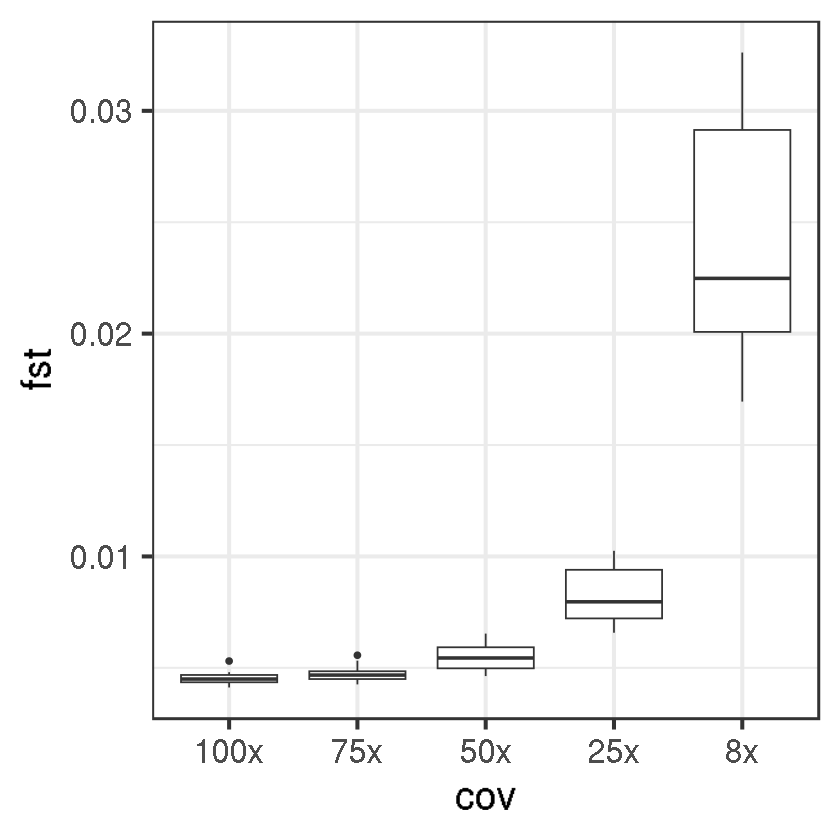

In [37]:
ggplot(data.poolseq.meta.median, aes(x = cov, y = fst) ) +
    geom_boxplot() +
    theme_bw(base_size = 25)